In [1]:
import  os, sys
import pandas as pd
import pickle as pkl
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS
import torch
from scipy import io
import os
import sys
import seaborn as sns
import numpy as np 




# Resolve project root (parent of src)
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..', '..'))
sys.path.append(project_root)  # Add the project root to sys.path


# Import module
from src.datasets.zipfian_dataset import create_dataloaders

import importlib


from src.analyses import embedding_analysis
importlib.reload(embedding_analysis)

from src.analyses.embedding_analysis import Embedding_analysis



In [2]:
analyser = Embedding_analysis("/home/student/Desktop/Groundeep/training_tensors/zipfian","/home/student/Desktop/Groundeep/networks/zipfian/idbn_trained_zipfian_1500_2000.pkl")
embeddings,labels = analyser._get_encodings()

In [4]:
embeddings = np.array(embeddings, dtype=np.float64)

mds = MDS(n_components=2, max_iter=100,  n_jobs=-1, dissimilarity = 'euclidean',random_state = 42)
emb = mds.fit_transform(embeddings)


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.cm import get_cmap

def plot_embeddings(emb, y, colormap="viridis", ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(20, 10))
    else:
        fig = None

    # Normalize y for color mapping (since y is ordinal)
    num_classes = len(np.unique(y))
    cmap = get_cmap(colormap, num_classes)  # Get a colormap with `num_classes` distinct colors
    norm = plt.Normalize(vmin=min(y), vmax=max(y))  # Normalize labels

    # Create scatter plot
    sc = ax.scatter(emb[:, 0], emb[:, 1], c=y, cmap=cmap, norm=norm, s=40)
    
    # Add colorbar to show mapping of ordinal labels
    cbar = plt.colorbar(sc, ax=ax, ticks=np.linspace(min(y), max(y), num_classes // 5))
    cbar.set_label("Class Index")

    return fig, ax


In [6]:
labels_not_1hot = np.argmax(labels,axis=1)

In [7]:
labels_not_1hot

array([ 3,  1, 31, ...,  3,  1,  0], shape=(5403,))

/tmp/ipykernel_220898/601163098.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap(colormap, num_classes)  # Get a colormap with `num_classes` distinct colors


(<Figure size 2000x1000 with 2 Axes>, <Axes: >)

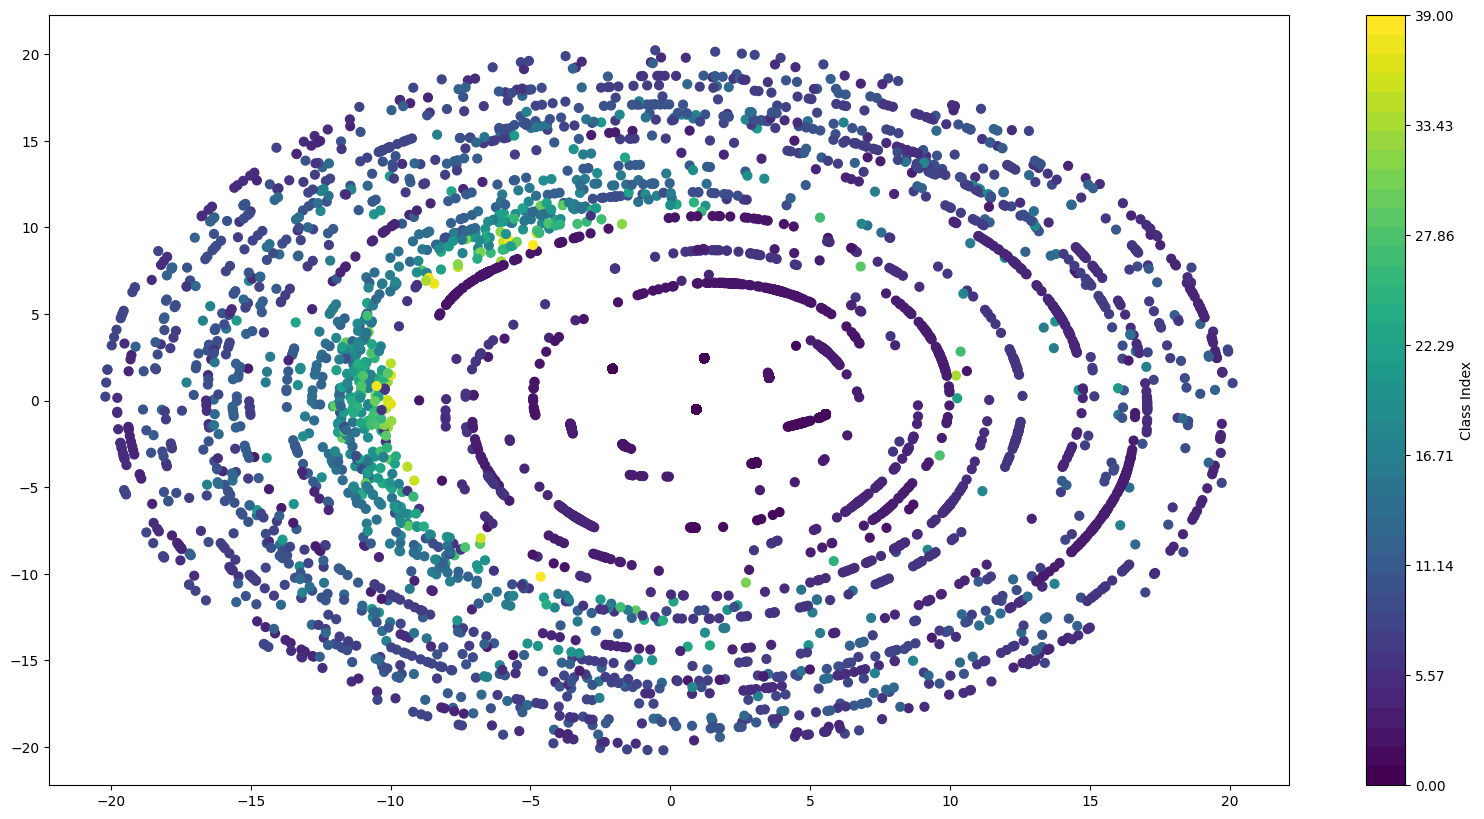

In [25]:
plot_embeddings(emb,labels_not_1hot)

In [29]:
data = np.load("/home/student/Desktop/Groundeep/training_tensors/uniform/NumStim_1to40_200x200_TR_uniform.npz")
data['D'].shape

(40000, 94640)

In [31]:
data['N_list'].flatten(
)

array([40, 40, 40, ...,  1,  1,  1], shape=(94640,))